# 4.9 PART II

# 1. Create a new notebook, import the necessary analysis and visualization libraries, then import your most up-to-date project data (i.e., the data set with your new customer data from the first part of this task).

In [1]:
# Importing libraries and the three new libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Defining and creating path, importing and then double checking imported merged project data set

In [2]:
# Defining path
path = r'/Users/renataherrera/Documents/CF RH 2023-2024/CF DATA IMMERSION/CF RH A4 PYTHON/RH_PYTHON_Instacart Basket Analysis'

In [3]:
# Checking path
path

'/Users/renataherrera/Documents/CF RH 2023-2024/CF DATA IMMERSION/CF RH A4 PYTHON/RH_PYTHON_Instacart Basket Analysis'

In [4]:
# importing new dataset as a df
df_customer = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customer_merged.pkl'))

In [5]:
# checking shape and dimensions of import
df_customer.shape

(32434212, 34)

In [6]:
# Double checking the imported df
df_customer.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_previous_order,product_id,add_to_cart_order,reordered,...,order_frequency_flag,first_name,surname,gender,state,age,date_joined,n_dependants,fam_status,income
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


# 2. If you haven’t done so already, follow the instructions in the Exercise to create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart.

Bar charts make it easy to determine how the observations in your data set are distributed among the categories of a variable. 

Create one for your “orders_day_of_week” column. 

At the end, however, comes the new, additional function: plot.bar(). This tells Python to find the bar() function within the plot module, and it’s what actually creates your bar chart. Ensure that you always run this function on the frequency of the column in question (rather than directly on the column itself) as, otherwise, it could take considerable time to produce the chart.

What’s that “matplotlib” doing in the output? 

With matplotlib installed on your machine, pandas now has access to functions and logic from the matplotlib library. It drew on that logic in order to execute your function and create the bar chart. 

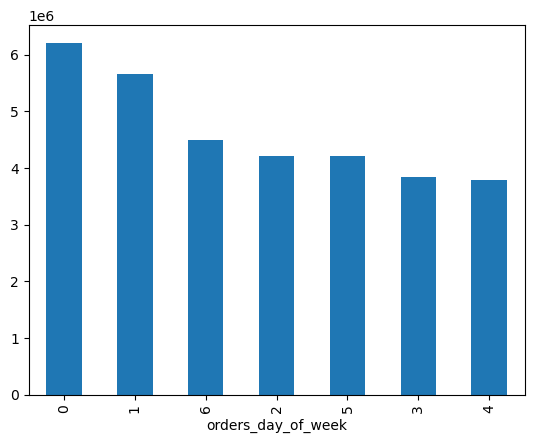

In [7]:
# Creating a bar chart for orders_day_of_week column
bar_orders_day_of_week = df_customer['orders_day_of_week'].value_counts().plot.bar()

# Observations largest to smallest

The sort_index() function will sort the bars in your chart according to their index order (rather than largest to smallest).

In [8]:
# Reordering columns to appear in their indexed order
# when printing frequencies
df_customer['orders_day_of_week'].value_counts().sort_index()

orders_day_of_week
0    6209632
1    5665830
2    4217766
3    3844096
4    3787193
5    4209449
6    4500246
Name: count, dtype: int64

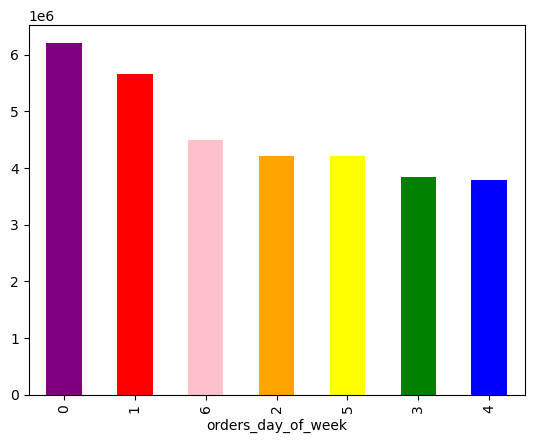

In [9]:
# Including an indexed list of the colors you want for your bars as an argument in your function.
bar_orders_day_of_week = df_customer['orders_day_of_week'].value_counts().plot.bar(color = ['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

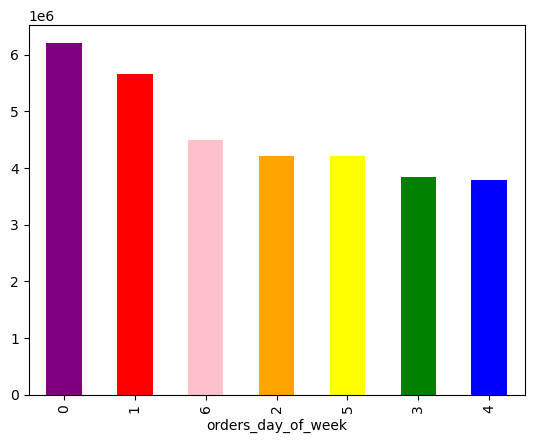

In [10]:
# Exporting in the form of an image file
bar = df_customer['orders_day_of_week'].value_counts().plot.bar(color = ['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [11]:
# Saving the bar visualization
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

# Creating Histograms and Scatterplots

Histograms are used to show the density of a continuous variable—the distribution of observations per their occurrence in a data set. This is different from bar charts as bar charts organize observations according to some category. That’s why bar charts are good for categorical data and histograms are more appropriate for continuous data.

You’ll notice it follows the same logic as the code for creating a bar chart. The only difference lies in the use of hist() instead of bar() after the plot. There’s also an extra argument that needs to go within the parentheses. This is how you determine the granularity of the histogram. A smaller number of bins equates to denser bars, while a larger number of bins equates to sparser bars.

<Axes: ylabel='Frequency'>

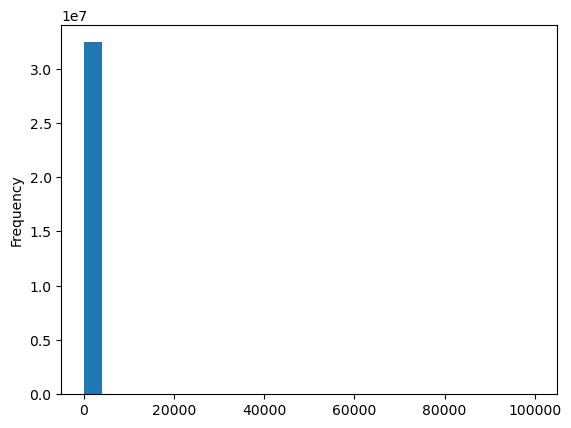

In [12]:
#Creating a histogram of the "prices" column
df_customer['prices'].plot.hist(bins = 25)

Something doesn’t seem right here. You should have gotten 25 bars (one for each bin). Instead, however, you’ve gotten one single column. The reason for this has a lot to do with the data prep stage.

Remember that the describe() function gives you a quick list of descriptive statistics for a column.

Do you notice something odd in the maximum value? To further investigate, you could also conduct a few checks for each specific statistic:

In [13]:
#Checking the descriptive stats of price column
df_customer['prices'].describe()

count    3.243421e+07
mean     1.198114e+01
std      4.954311e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [14]:
#Further investigating by a few checks for each specific stat
df_customer['prices'].mean()

11.981143922966249

In [15]:
df_customer['prices'].median()

7.4

In [16]:
df_customer['prices'].max()

99999.0

# These more-specific checks will give you answers that are a bit easier to read and interpret.

While the mean and median are between 7 and 12 (relatively realistic), the max value yields a strange result. How could an item cost $99,999.00? This must be the result of data corruption or some kind of special value within the data. This is also what’s breaking your histogram—having most values between 7 and 12 (see the median and mean again) but an extreme value of 99,999 is forcing your histogram to shove all the small values into one bar and the extreme value in another one. And this second bar is so tiny that you can’t even see it on the chart. Hence, the one-column histogram you saw above.

# Another way to explore your data is to create a scatterplot. Normally, you’d use scatterplots to investigate the relationship between two variables. However, when conducting an exploratory analysis, you can also use scatterplots to visualize the distribution of data points in order to identify any outliers.

<Axes: xlabel='prices', ylabel='prices'>

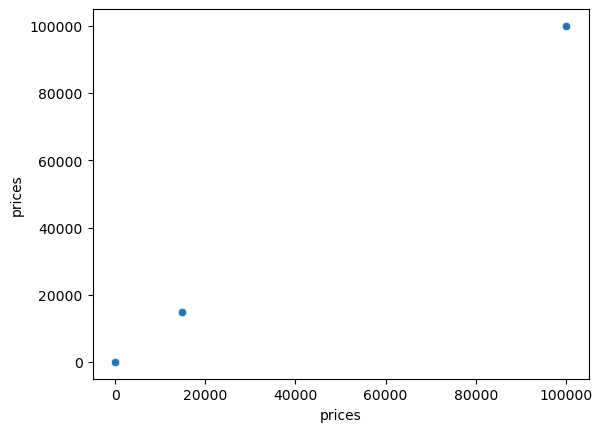

In [17]:
# Creating a scatterplot by plotting the "prices" column against itself
# This will reveal if there are any outliers
sns.scatterplot(x = 'prices', y = 'prices',data = df_customer)

Scatterplots are created by way of the scatterplot() function, which is included in the seaborn library (imported into your notebook as sns). Within the parentheses, you include arguments in the form of axes. Here, the “prices” column has been used for both the x- and y-axes. The mean of the column is around 12, so you’d expect the data points to be distributed somewhere around this number. However, there are two data points far, far beyond values you’d ever expect—values close to 20,000 and even 100,000. This close-to-100,000 value corresponds to the max value you identified in your checks. But what about the close-to-20,000 value?

# But what about the close-to-20,000 value? To investigate this, you can run a few more exploratory checks on your data.

Let’s first determine whether there are any values above a certain threshold in your data, for instance, anything above the “normal” price of a supermarket item. If you imagined the maximum price anyone would pay in a supermarket were around $100, then anything above that amount could be considered an outlier. Run this check via the following code:

In [18]:
#Checking the threshold of anything above the "normal price" of a supermarket item
df_customer.loc[df_customer['prices'] > 100]

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_previous_order,product_id,add_to_cart_order,reordered,...,order_frequency_flag,first_name,surname,gender,state,age,date_joined,n_dependants,fam_status,income
7816,1435153,1519,prior,26,2,11,6.0,21553,15,0,...,Frequent customer,Craig,Clark,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864
7817,1066435,1519,prior,32,3,10,5.0,21553,28,1,...,Frequent customer,Craig,Clark,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864
15172,1697208,2409,prior,33,1,19,5.0,21553,1,0,...,Frequent customer,Nicole,Odonnell,Female,Hawaii,55,11/11/2018,2,married,230074
20294,965345,3531,prior,27,2,19,8.0,33664,2,0,...,Frequent customer,Alice,Compton,Female,Hawaii,80,10/6/2019,2,married,233776
20528,2943740,3793,prior,1,2,9,NaN,21553,3,0,...,Regular customer,Jerry,Allen,Male,Louisiana,59,8/23/2019,3,married,182933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32333019,3265389,51346,prior,4,1,17,13.0,33664,2,1,...,Regular customer,nan,Gould,Male,Rhode Island,58,1/25/2019,1,married,207497
32337105,1179092,131671,prior,12,4,9,15.0,33664,1,0,...,Regular customer,Diana,Hansen,Female,Rhode Island,35,8/4/2018,0,single,86490
32340034,1226705,39667,prior,7,2,15,20.0,33664,14,0,...,Regular customer,Johnny,Colon,Male,Rhode Island,78,5/8/2019,2,married,195077
32359285,3000037,95105,prior,2,4,19,22.0,33664,4,0,...,Frequent customer,Catherine,Browning,Female,South Carolina,48,1/18/2017,2,married,398880


From the output, you can see that there are 5,127 rows with outlier observations (prices greater than $100). In addition, at the top of the “prices” column, you can see that there’s another odd value, $14,900.00, which corresponds to the second unexplainable point in the scatterplot. Following this is the $99,999.00 you identified previously. As such, you can assume that it’s the $14,900.00 and $99,999.00 values that are skewing your charts.

your data quality checks—as well as how visualizations can help you explore your data. You should never leave an issue like this unfixed as it could very well blow up in your face at some point and spoil the results you’re trying to achieve. A first likely step would be to consult your client or a more senior stakeholder for guidance on how to treat these values. They might, for instance, be special values within the Instacart system.



In [19]:
#Marking as missing values and turning them into NaNs
#looking for values above 100 within the "prices" column and assigning them a value
df_customer.loc[df_customer['prices'] >100, 'prices'] = np.nan

In [20]:
# checking whether the replacement was successful 
# by running a max-value check on your “prices” column
df_customer['prices'].max()

25.0

Now that you’ve replaced all your outliers with missing values, your max value is a much more realistic price point of 25. Perfect. Logically, you know that a $25 grocery item is much more likely than a $14,900 item (and especially a $99,999 item!).

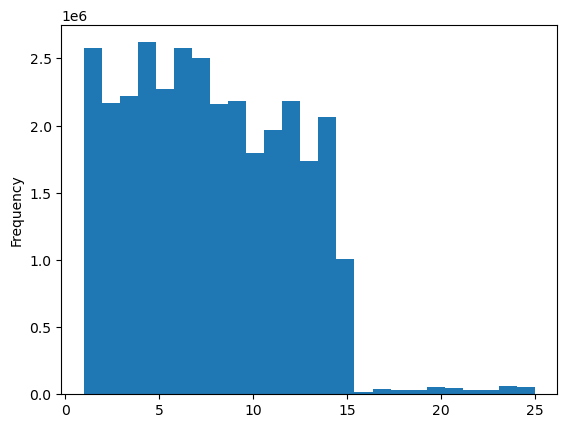

In [21]:
#re-trying histogram of "prices" column, (after ad-hoc data clean)
hist_cleaned = df_customer['prices'].plot.hist(bins = 25)

# our results make much more sense now: most products are between $1 and $15, while a few are higher priced at $15 to $25. 

To increase the level of granularity in the histogram, simply increase the number of bins to, say, 70. This will result in a histogram with more, thinner columns:

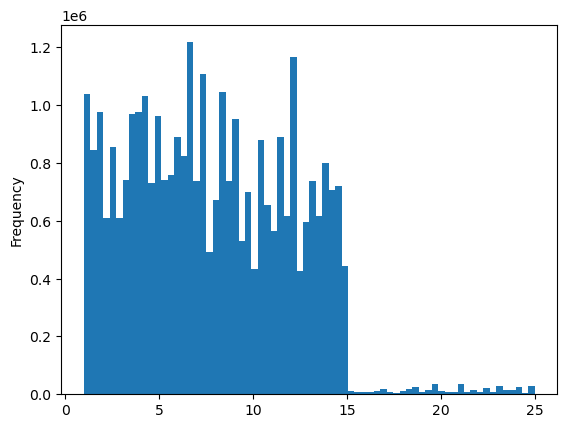

In [22]:
#Re-creating a cleaned histogram with bins of 70 for increased level of granularity
hist_cleaned_bins_70 = df_customer['prices'].plot.hist(bins = 70)

In [53]:
df_customer.columns


Index(['order_id', 'user_id', 'eval_set', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_previous_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merge', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_price', 'spending_flag', 'median_previous_order',
       'order_frequency_flag', 'first_name', 'surname', 'gender', 'state',
       'age', 'date_joined', 'n_dependants', 'fam_status', 'income'],
      dtype='object')

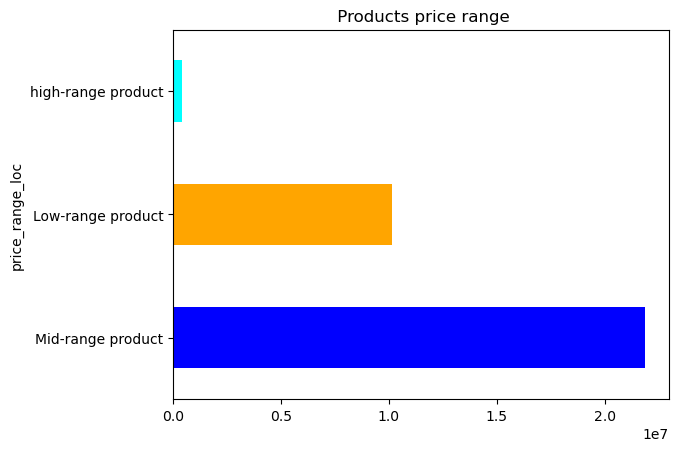

In [54]:
price_range = df_customer['price_range_loc'].value_counts().plot.barh(color = ['blue', 'orange', 'cyan'], title = ' Products price range')

In [58]:
df_customer['price_range_loc'].value_counts().sort_index()

price_range_loc
Low-range product     10126384
Mid-range product     21890146
high-range product      417682
Name: count, dtype: int64

In [59]:
df_customer.shape


(32434212, 34)

# Creating Line Charts

# Using a sample subset to create a line chart

Line charts are traditionally used to visualize the development of a characteristic over time. Since you don’t have dates that could indicate a timeline in your Instacart data, you won’t be able to test this out on your project just yet. You could, however, test out a different type of line chart, such as the development of the “prices” column across the days of the week. To achieve this, you’d plot the “orders_day_of_week” column on the x-axis and the “prices” column on the y-axis.

There is, however, one major caveat: this line chart will require a great deal of computing power due to the number of unique values in the “prices” column. As such, you’re likely to get a memory error and/or have your browser crash (if you have a machine with less than 16GB RAM maybe keep in mind that attempting this will cost you time to reset and start over). To avoid this, you can use the subsetting method you should be familiar with by now. For example, you might consider only plotting the top or bottom 2,000,000 rows of your dataframe:

# Sampling Data --because a subset wouldn’t be representative of the entire population. How, then, do you tackle a problem like this? The answer is simple—sampling!

you can split your dataframe into two samples with the same distribution, for instance an 80/20 or 70/30 split. If done correctly, both samples would have an equal proportion of data. In a 70/30 split, for example, the 30 percent sample would statistically resemble the 70 percent sample but contain less rows. You can then create charts from these samples the same as you would any other subset, the only difference being that you know these subsets accurately represent the entire dataframe as a whole.
This is a standard approach in machine learning. When training a model, you’d normally use 80 percent of a data set to train the algorithm and the remaining 20 percent to check the accuracy of the model.


# Splitting dataframes 

to recap each piece of the split code, you need to:

Set the seed for the random number generator.

Create 32,404,859 random numbers (the length of your ords_prods_merge dataframe) ranging between 0 and 1.

Code a logical test comparing each of those numbers to a value of 0.7 (either less than or greater than 0.7).

Store the results of the test in a new list, dev, in the form of boolean values (True and False).

# Two dataframes, big and small

How can you use your list to split your dataframe into two samples? This will involve an elegant hack:

big = ords_prods_merge[dev]
small = ords_prods_merge[~dev]

The two dataframes above, big and small, are the samples you’ll create from your ords_prods_merge dataframe. What you want to do is store 70 percent of your dataframe in the big sample and 30 percent of your dataframe in the small sample.

# 3. You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.
In a markdown cell beneath your histogram, describe what the histogram demonstrates.

In [23]:
#Defining path 
path = r'/Users/renataherrera/Documents/CF RH 2023-2024/CF DATA IMMERSION/CF RH A4 PYTHON/RH_PYTHON_Instacart Basket Analysis'

In [24]:
# Checking path
path

'/Users/renataherrera/Documents/CF RH 2023-2024/CF DATA IMMERSION/CF RH A4 PYTHON/RH_PYTHON_Instacart Basket Analysis'

In [25]:
# Importing file
customer_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customer_merged.pkl'))

In [26]:
# checking shape and rows and columns of import
customer_merge.shape

(32434212, 34)

In [27]:
# Double checking by viewing the imported df
customer_merge.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_previous_order,product_id,add_to_cart_order,reordered,...,order_frequency_flag,first_name,surname,gender,state,age,date_joined,n_dependants,fam_status,income
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


Text(0.5, 1.0, 'Instacart Order Hour of Day by Frequency')

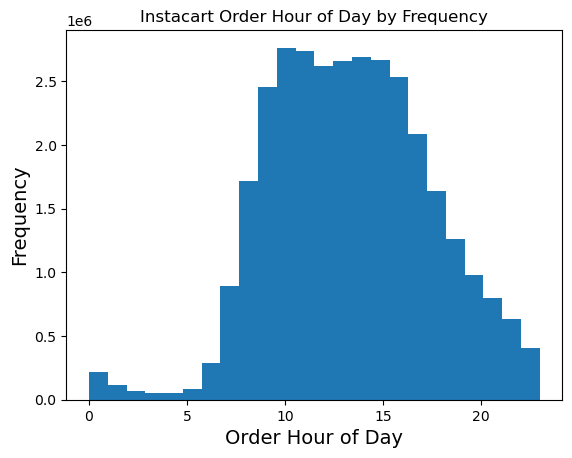

In [28]:
# Creating a histogram of the "order_hour_of_day" (from 0 to 24 hours--bins) column
hist_order_hour_of_day = customer_merge['order_hour_of_day'].plot.hist(bins = 24)
plt.xlabel("Order Hour of Day", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Instacart Order Hour of Day by Frequency")

# 3 A Descriptive findings about sales:

# From 6:00 to 9:00 in the morning, sales begin, and slowly and steadily increase until most sales reached, peaking at 10:00.

# From 10:00 to 15:00 mid-day hours with most sales activity,  with toward end of day from 16:00 through to 20:00 moderate sales activity

# 21:00 through to 24:00 period sales steadily decreased, with most decreased order hour of day activity from 01:00 to 05:00.

In [29]:
# Saving and exporting the hist visual
hist_order_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'instacart_hist_order_hour_of_day.png'))

In [30]:
# Checking new hist
hist_order_hour_of_day

<Axes: title={'center': 'Instacart Order Hour of Day by Frequency'}, xlabel='Order Hour of Day', ylabel='Frequency'>

# 4. The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

Text(0.5, 1.0, 'Instacart Customer Loyalty by Number of Orders')

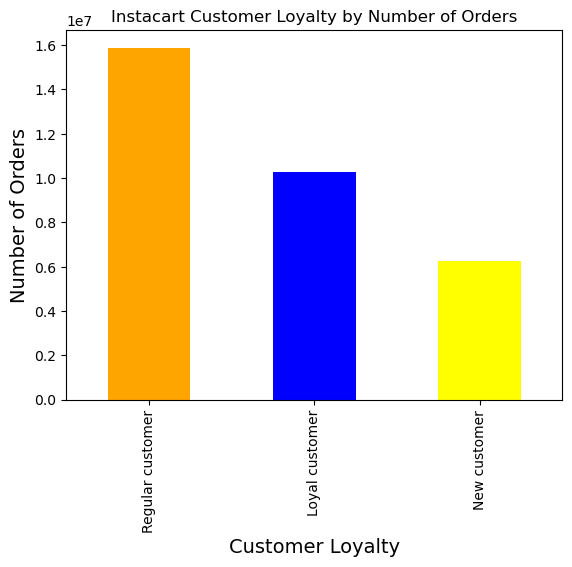

In [31]:
# Creating a threshold of the "loyalty_flag" column in the df
bar_loyalty_flag = customer_merge['loyalty_flag'].value_counts().plot.bar(color= ['orange', 'blue', 'yellow'])
plt.xlabel("Customer Loyalty", fontsize=14)
plt.ylabel("Number of Orders", fontsize=14)
plt.title("Instacart Customer Loyalty by Number of Orders")

In [32]:
# Saving and exporting the bar visual
bar_loyalty_flag.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'instacart_bar_customer_loyalty_no_of_orders.png'))

In [33]:
#Checking the bar chart
bar_loyalty_flag

<Axes: title={'center': 'Instacart Customer Loyalty by Number of Orders'}, xlabel='Customer Loyalty', ylabel='Number of Orders'>

# 4 A In terms of loyalty:

# First - Regular customers make up for the most number of orders, and therefore are the no.1 Instacart users; use IC the most

# Second - Loyal customers make up the second most number of orders

# Third - New customers come in last with the least number of orders

# 5. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

to recap
Set the seed for the random number generator.

Create 32,404,859 random numbers (the length of your ords_prods_merge dataframe) ranging between 0 and 1.

Code a logical test comparing each of those numbers to a value of 0.7 (either less than or greater than 0.7).

Store the results of the test in a new list, dev, in the form of boolean values (True and False).

In [34]:
# Creating an acccurate subset sample df for making a "prices" and "hour of day" comparison for a line chart
# Creating a list holding True/False values to the test np.random.rant()<=0.7
np.random.seed(4)
dev = np.random.rand(len(customer_merge)) <= 0.7

In [35]:
# Storing the results of the test in a new list
dev

array([False,  True, False, ..., False,  True,  True])

In [36]:
# Splitting new list into two samples created from customer_merge df
# storing 70 percent of your df in the df big sample 
# and 30 percent in the df small sample
#according to values in your dev list
big = customer_merge[dev]
small = customer_merge[~dev]

In [37]:
#Checking the count of the df number of rows
len(customer_merge)

32434212

In [38]:
#Checking if subsetting procedure successful
#70 percent of big and 30 percent of small
len(big) + len(small)

32434212

# Success! (Exact same number of rows)

In [39]:
# creating a new dataframe, df_price_column,
# and that is containing only columns "order_hour_of_day" and "prices" 
# from small subset--30% data
df_price_hour = small[['prices','order_hour_of_day']]

In [40]:
# Checking subset
df_price_hour.head()

,prices,order_hour_of_day
0,9.0,8
2,9.0,12
3,9.0,7
6,9.0,9
10,12.5,8


In [41]:
# Double checking rows and columns of subset
df_price_hour.shape

(9729729, 2)

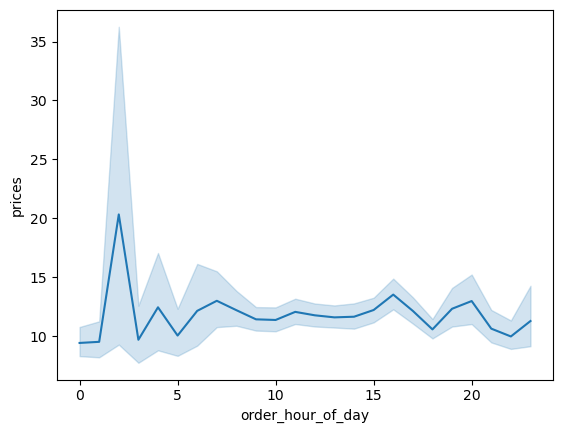

In [42]:
# create a line graph chart
# from a representative sample--30% of df 
instacart_line_plot_order_hour_prices = sns.lineplot(data = df_price_hour, x = 'order_hour_of_day',y = 'prices')

In [43]:
# Saving and exporting the bar visual
instacart_line_plot_order_hour_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'instacart_line_plot_order_hour_prices.png'))

# 5 A There's no real difference in expenditure (the "prices" column) depending on the hour of day. As a result, the price of products and hour of day they are purchased are independent of each other.

# But how do you know for a fact that the new line chart you’ve created is? 

# TIP: it requires a good amount of computing power, so it could take forever to execute, crash your machine, or both

The best way to check is to compare the line chart of your subset with the line chart of the entire dataframe (or even the big sample). For instance, the line chart of your entire dataframe would look like this:

df_4 = customer_merge[['order_hour_of_day', 'prices']]
line_2 = sns.lineplot(data = df_4, x = 'order_hour_of_day', y = 'prices')

If the shape of the line chart for the entire dataframe looks very similar to the shape of the line chart for your subset. That means your subset is an accurate representation of the entire dataframe.

# Days of the week on the bottom and a range of product prices on the left.

# The blue line, then, represents how prices differ depending on the day of the week. 

# The peaks on days zero and six mean that most money is spent on Friday and Saturday. This might be due to people stocking up on things before the weekend.

Error bands hey represent the chart’s confidence intervals. In other words, if this line were a prediction, there would be a 95 percent probability that the predicted value would fall within the area of the error bands.

# 6. Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:
In a markdown cell beneath your line chart, describe what the line chart shows.

In [44]:
#Checking column names of family situation
customer_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434212 entries, 0 to 32434211
Data columns (total 34 columns):
 #   Column                     Dtype   
---  ------                     -----   
 0   order_id                   int64   
 1   user_id                    int64   
 2   eval_set                   object  
 3   order_number               int64   
 4   orders_day_of_week         int64   
 5   order_hour_of_day          int64   
 6   days_since_previous_order  float64 
 7   product_id                 int64   
 8   add_to_cart_order          int64   
 9   reordered                  int64   
 10  product_name               object  
 11  aisle_id                   int64   
 12  department_id              int64   
 13  prices                     float64 
 14  _merge                     category
 15  price_range_loc            object  
 16  busiest_day                object  
 17  busiest_days               object  
 18  busiest_period_of_day      object  
 19  max_order          

Text(0.5, 1.0, 'Instacart Number of Users by Customer Loyalty')

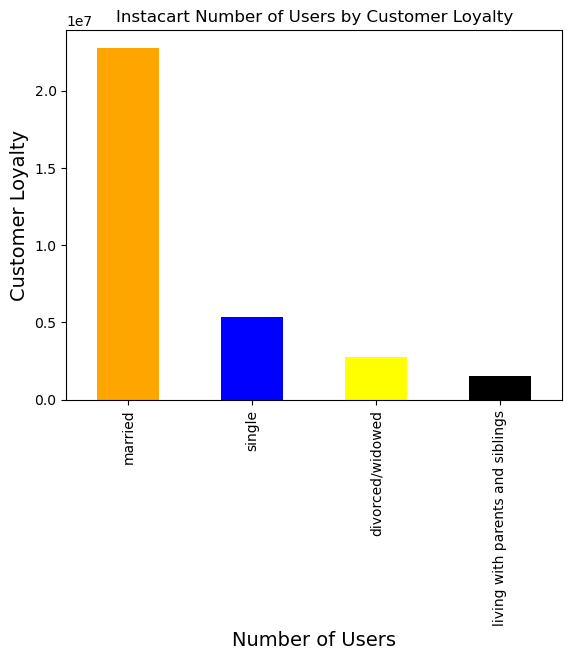

In [45]:
# Creating a threshold of the "loyalty_flag" column in the df
fam_status = customer_merge['fam_status'].value_counts().plot.bar(color= ['orange', 'blue', 'yellow', 'black'])
plt.xlabel("Number of Users", fontsize=14)
plt.ylabel("Customer Loyalty", fontsize=14)
plt.title("Instacart Number of Users by Customer Loyalty")

In [46]:
# creating a line plot of age and n_dependants columns
# creating a new dataframe, df_age_n_dependants,
# and that is containing only columns "age" and "n_dependants" 
# from small subset--30% data
df_age_depends = small[['n_dependants','age']]

In [47]:
# Checking subset
df_age_depends.head()

,n_dependants,age
0,3,31
2,3,31
3,3,31
6,3,31
10,3,31


In [48]:
# Double checking rows and columns of subset
df_age_depends.shape

(9729729, 2)

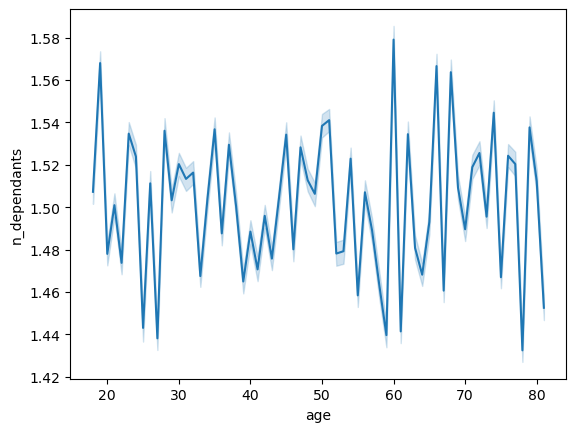

In [49]:
# create a line graph chart
# from a representative sample--30% of df 
instacart_line_plot_age_n_dependants = sns.lineplot(data = df_age_depends, x = 'age',y = 'n_dependants')

# 6 A Out of the four categories of family status: married, single, divorced/widowed and living with parents and siblings, the majority of Instacart users are categorized as "married". There is no connection between age, number of dependants and/or family status.

In [50]:
# Saving and exporting the line plot visual
instacart_line_plot_age_n_dependants.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'instacart_line_plot_age_n_dependants.png'))

# 7. You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.
In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

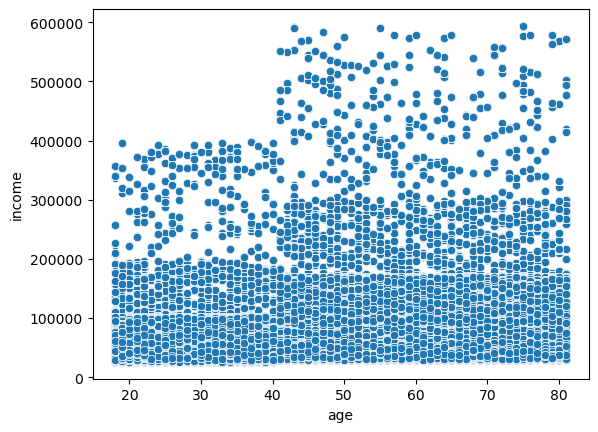

In [51]:
# Creating a scatterplot by plotting the "age" column against income
# This will reveal if there are any outliers
instacart_scatter_plot_age_income = sns.scatterplot(x = 'age', y = 'income',data = small)

In [52]:
# Saving and exporting the scatterplot plot visual
instacart_scatter_plot_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'instacart_scatter_plot_age_income.png'))

# 7 A Results of the scatterplot indicate a connection betweeen age and income. From the age of 40 and above, there is a higher income bracket of 400,000+, therefore spending power has the potential to increase.

# 8. Export your visualizations as “.png” files in your relevant project folder

# 9. Save your notebook from part 2 of this Exercise’s task.

# 10. Submit your notebooks for both the first and second parts of this task to your tutor for review.